In [57]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [59]:
p_yes = df['buys_computer'].value_counts(normalize=True)['yes']
p_no = df['buys_computer'].value_counts(normalize=True)['no']
entropy_buys_computer = - (p_yes * np.log2(p_yes) + p_no * np.log2(p_no))

print(f"Entropy of 'buys_computer': {entropy_buys_computer:.2f}\n")

Entropy of 'buys_computer': 0.94



In [60]:
#entropy

def calc_entropy(attribute):
  vals=df[attribute].unique()
  entropy=0

  for val in vals:
    pval=df[df[attribute]==val]['buys_computer'].value_counts(normalize=True)
    if len(pval)==2:
      entropy_val = - (pval['yes'] * np.log2(pval['yes']) + pval['no'] * np.log2(pval['no']))

    else:
      entropy_val=0

    weight=len(df[df[attribute]==val]) / len(df)
    entropy += weight*entropy_val
    return entropy

In [61]:
attributes = ['age', 'income', 'student', 'credit_rating']

for att in attributes:
    entropy = calc_entropy(att)
    print(f"Entropy of '{attributes}': {entropy:.2f}")

Entropy of '['age', 'income', 'student', 'credit_rating']': 0.35
Entropy of '['age', 'income', 'student', 'credit_rating']': 0.29
Entropy of '['age', 'income', 'student', 'credit_rating']': 0.49
Entropy of '['age', 'income', 'student', 'credit_rating']': 0.46


In [62]:
entropy_buys_computer = 0.94
entropy_age = 0.35
entropy_income = 0.29
entropy_student = 0.49
entropy_credit_rating = 0.46

total=len(df)

gain_age = entropy_buys_computer - (total / total * entropy_age)
gain_income = entropy_buys_computer - (total / total * entropy_income)
gain_student = entropy_buys_computer - (total / total * entropy_student)
gain_credit_rating = entropy_buys_computer - (total / total * entropy_credit_rating)

print("IG for age:", gain_age)
print("IG for income:", gain_income)
print("IG for student:", gain_student)
print("IG for credit_rating:", gain_credit_rating)

IG for age: 0.59
IG for income: 0.6499999999999999
IG for student: 0.44999999999999996
IG for credit_rating: 0.4799999999999999


In [63]:
df_encoded=pd.get_dummies(df, columns=['age', 'income', 'student', 'credit_rating'])

X = df_encoded.drop(columns=['buys_computer'])
y = df_encoded['buys_computer']

model = DecisionTreeClassifier()

In [64]:
model = model.fit(X, y)

print("Depth: ", model.get_depth())

Depth:  4


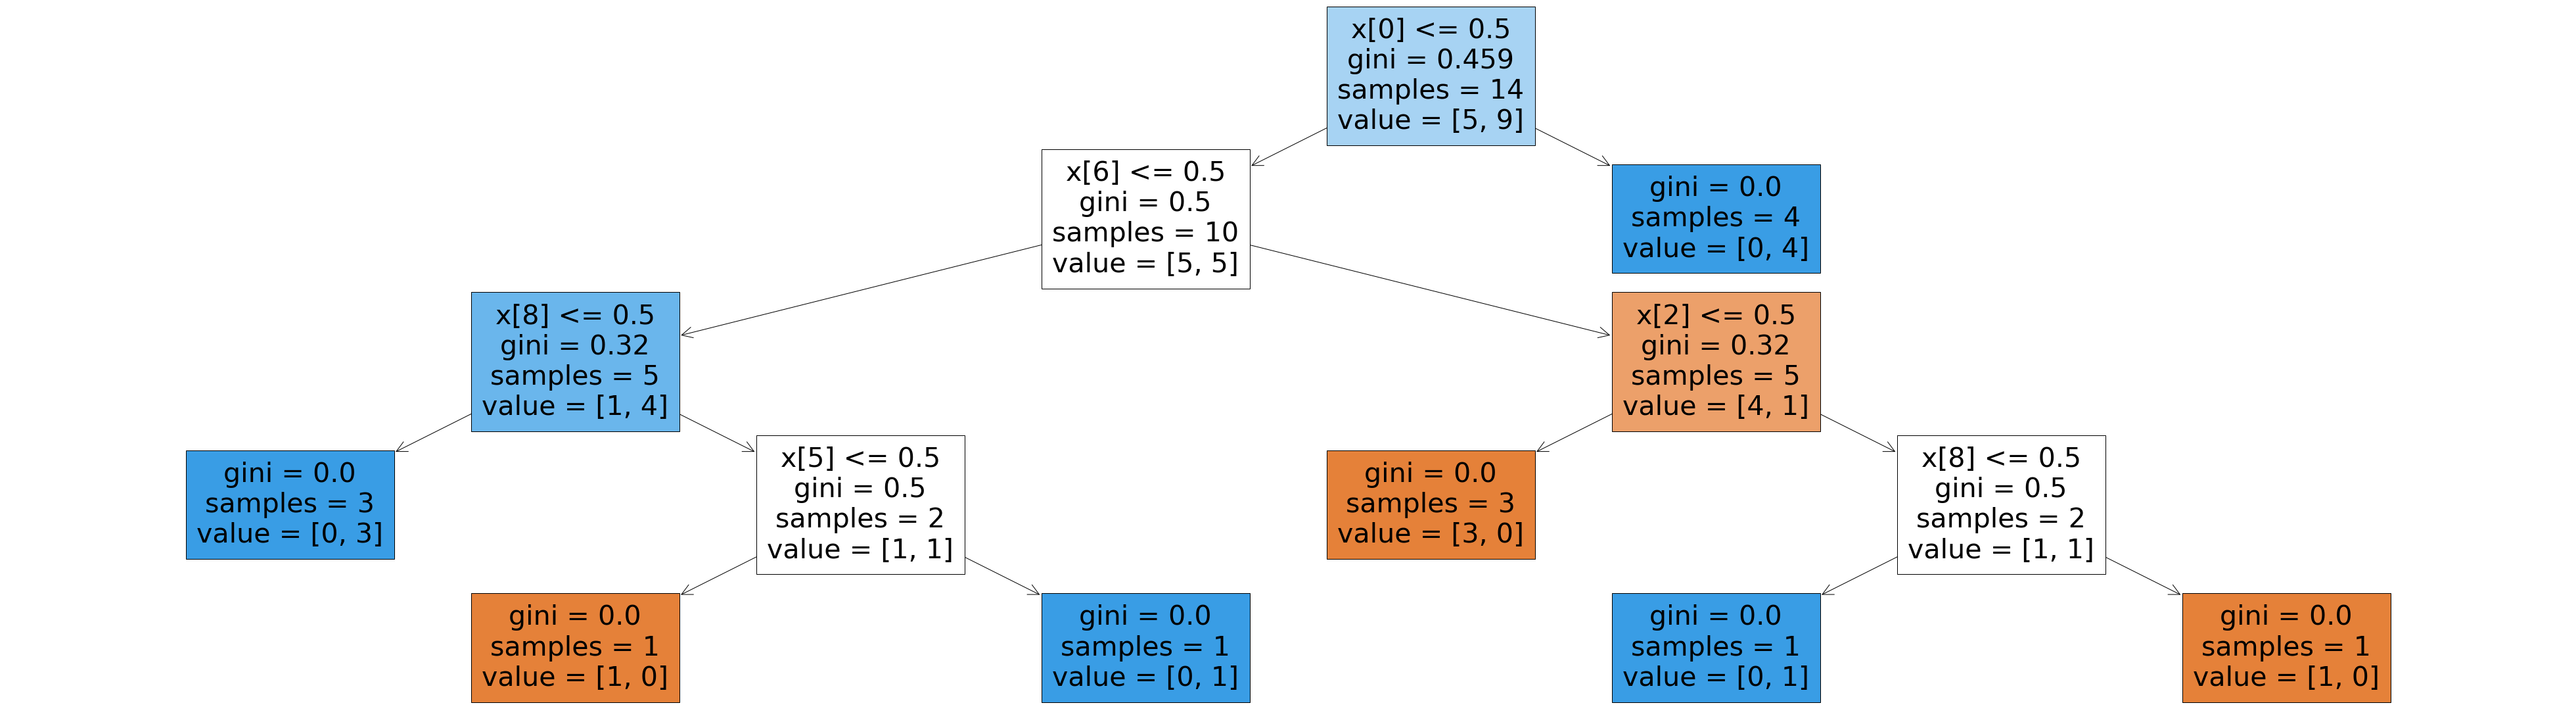

In [65]:
plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True)
plt.show()

In [66]:
data1 = pd.read_excel('Dataset_to_ B.tech.xlsx')
data1

,Id,Judgment,Lawyers Summary,Golden summary,Domain,Judgment Status,Equivalent Citation,Name,Court name,Label,Link
0,1,"""1. Being aggrieved by the judgment delivered ...","""The appeal was filed by a co-operative socie...","""The appellant, a cooperative society, filed a...",Civil,Appeal dismissed,CIVIL APPEAL NO. 3880 OF 2003,Rajasthan R.S.S. & Ginning Mills Fed.Ltd Vs. D...,Supreme Court,0,NaN
1,2,"""This was an appeal from a judgment and decree...","A complaint has been lodged against you, unde...","""The appellants were members of the East India...",Civil,Appeal dismissed,"1950 AIR, 7 1950 SCR 64",Messrs. Khimji Poonja And Company vs Shri Bald...,Supreme Court,0,NaN
2,3,"""This was an application under article 32 (1) ...",Appeal comes under article 374 (4) of the Con...,"""Petitioner Rashid Ahmed is running a wholesal...",Civil,Petition allowed,"1950 AIR 163, 1950 SCR 566","Rashid Ahmed vs The Municipal Board, Kairana.T...",Supreme Court,0,NaN
3,4,"""APPEAL from a judgment of the High Court of H...",The appeal was presented to the Judicial Commi...,"""The decree-holder made an application in revi...",Civil,Appeal allowed,"1953 AIR 413, 1950 SCR 747",Supreme Court Of India ... vs Kadar Unnisa Beg...,Supreme Court,0,NaN
4,5,"""APPEAL under article 374(4) of the Constituti...",The appeal was presented to the Judicial Commi...,"""An application was made for the execution of...",Civil,Appeal allowed,"1950 AIR 274, 1950 SCR 741",Supreme Court Of India ... vs Nandlal on 12 O...,Supreme Court,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
895,896,documents in column 3 thereof. The petitioner ...,,,Writ,NaN,NaN,NaN,Calcutta High Court,2,NaN
896,897,for such unauthorised construction before the ...,,,Civil,NaN,NaN,NaN,Calcutta High Court,0,NaN
897,898,"Mr. Jayanta Kr. Mitra, Sr. Advocate with Mr. R...",,,Writ,NaN,NaN,NaN,Calcutta High Court,2,NaN
898,899,Considering the averments contained in the app...,,,Revision Petition,NaN,NaN,NaN,Calcutta High Court,5,NaN


In [67]:
data1.columns

Index(['Id', 'Judgment', 'Lawyers Summary', 'Golden summary', 'Domain',
       'Judgment Status', 'Equivalent Citation', 'Name', 'Court name', 'Label',
       'Link'],
      dtype='object')

In [73]:
# Remove rows with missing values in 'Judgment' or 'Lawyers Summary'
data1.dropna(subset=['Judgment', 'Lawyers Summary'], inplace=True)

# Define features (X) and target variable (y)
X = data1[['Judgment', 'Lawyers Summary', 'Domain']]
y = data1['Label']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Training Set Accuracy: 0.9978902953586498
Decision Tree Test Set Accuracy: 0.5294117647058824


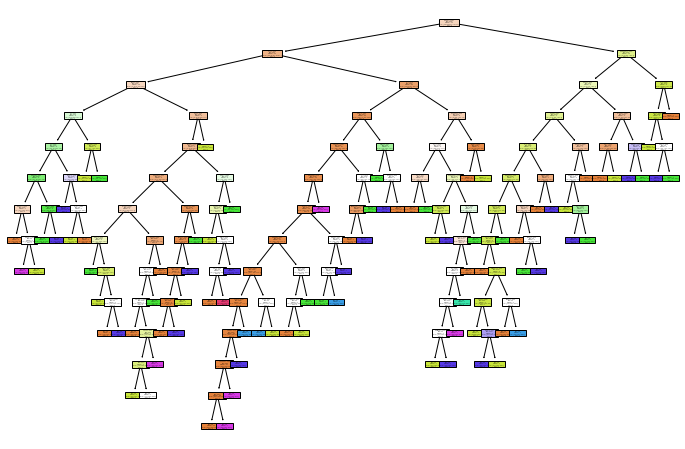

In [81]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['Judgment'] + ' ' + X_train['Lawyers Summary'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['Judgment'] + ' ' + X_test['Lawyers Summary'])

# Define class_names as a list of unique class labels converted to strings
class_names = [str(label) for label in y.unique()]

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

# Training Set accuracy for Decision Tree
dt_train_accuracy = dt_model.score(X_train_tfidf, y_train)
print("Decision Tree Training Set Accuracy:", dt_train_accuracy)

# Test Set Accuracy for Decision Tree
dt_test_accuracy = dt_model.score(X_test_tfidf, y_test)
print("Decision Tree Test Set Accuracy:", dt_test_accuracy)

# Plot the Decision Tree with class_names argument
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out(['Judgment', 'Lawyers Summary', 'Domain']), class_names=class_names)
plt.show()

Decision Tree (max_depth=5) Training Set Accuracy: 0.8016877637130801
Decision Tree (max_depth=5) Test Set Accuracy: 0.5882352941176471


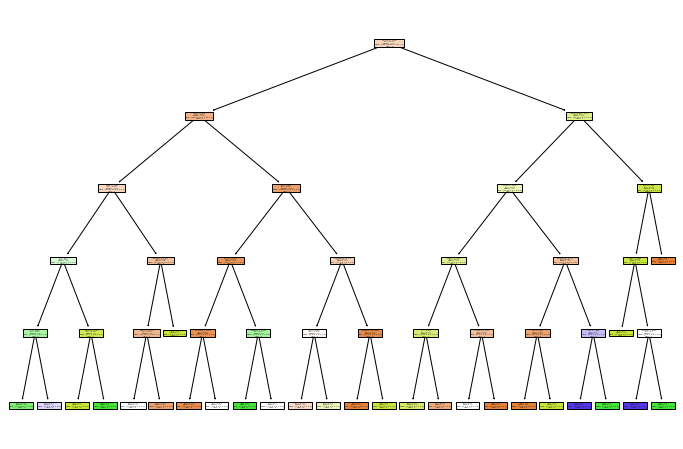

In [84]:
dt_model_max_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_max_depth.fit(X_train_tfidf, y_train)

# Convert class names to strings for max_depth constrained Decision Tree
class_names_max_depth = [str(label) for label in y.unique()]

# Training Set accuracy for Decision Tree with max_depth constraint
dt_max_depth_train_accuracy = dt_model_max_depth.score(X_train_tfidf, y_train)
print("Decision Tree (max_depth=5) Training Set Accuracy:", dt_max_depth_train_accuracy)

# Test Set Accuracy for Decision Tree with max_depth constraint
dt_max_depth_test_accuracy = dt_model_max_depth.score(X_test_tfidf, y_test)
print("Decision Tree (max_depth=5) Test Set Accuracy:", dt_max_depth_test_accuracy)

# Plot the Decision Tree with max_depth constraint and class_names argument
plt.figure(figsize=(12, 8))
plot_tree(dt_model_max_depth, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out(['Judgment', 'Lawyers Summary', 'Domain']), class_names=class_names_max_depth)
plt.show()

Decision Tree (Entropy Criterion) Training Set Accuracy: 0.9978902953586498
Decision Tree (Entropy Criterion) Test Set Accuracy: 0.4789915966386555


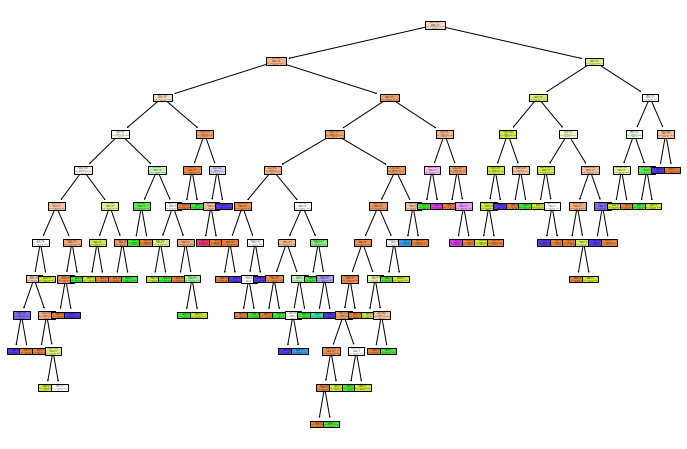

In [86]:
dt_model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model_entropy.fit(X_train_tfidf, y_train)

# Convert class names to strings for Decision Tree with entropy criterion
class_names_entropy = [str(label) for label in y.unique()]

# Training Set accuracy for Decision Tree with entropy criterion
dt_entropy_train_accuracy = dt_model_entropy.score(X_train_tfidf, y_train)
print("Decision Tree (Entropy Criterion) Training Set Accuracy:", dt_entropy_train_accuracy)

# Test Set Accuracy for Decision Tree with entropy criterion
dt_entropy_test_accuracy = dt_model_entropy.score(X_test_tfidf, y_test)
print("Decision Tree (Entropy Criterion) Test Set Accuracy:", dt_entropy_test_accuracy)

# Plot the Decision Tree with entropy criterion and class_names argument
plt.figure(figsize=(12, 8))
plot_tree(dt_model_entropy, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out(['Judgment', 'Lawyers Summary', 'Domain']), class_names=class_names_entropy)
plt.show()

In [87]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Training Set accuracy for Random Forest
rf_train_accuracy = rf_model.score(X_train_tfidf, y_train)
print("Random Forest Training Set Accuracy:", rf_train_accuracy)

# Test Set Accuracy for Random Forest
rf_test_accuracy = rf_model.score(X_test_tfidf, y_test)
print("Random Forest Test Set Accuracy:", rf_test_accuracy)

Random Forest Training Set Accuracy: 0.9978902953586498
Random Forest Test Set Accuracy: 0.6722689075630253


In [88]:
feature_importances = rf_model.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [8.36080014e-04 7.32135131e-04 5.42222958e-04 8.38861614e-04
 1.18104109e-04 3.16772767e-04 3.22412387e-04 5.32561159e-04
 4.57339333e-04 4.03860867e-04 8.09612140e-04 2.46267062e-03
 3.36132164e-04 1.35487893e-03 2.21575711e-03 1.27345214e-03
 3.83875631e-04 1.30319757e-03 1.29015782e-03 1.06378614e-03
 9.57110865e-04 9.37726165e-04 7.19842302e-04 1.06213181e-04
 6.55382257e-05 6.37947790e-04 3.04674758e-04 2.36184505e-04
 3.75716885e-04 8.53041860e-04 2.95102684e-04 6.51182266e-04
 8.90221691e-04 1.53664130e-04 6.33270399e-04 1.33185567e-03
 6.31521321e-04 8.38912717e-04 5.25693797e-04 9.68486792e-04
 1.72346828e-03 7.27420463e-04 6.67000525e-04 6.26660424e-04
 1.92977170e-03 1.50642382e-03 9.06975383e-04 1.89708092e-04
 1.13093023e-05 2.42806807e-04 1.99970128e-03 2.41607562e-04
 1.51522787e-04 7.68663058e-04 6.23451594e-05 2.77416441e-04
 1.00832509e-04 2.99389667e-03 6.17972499e-04 1.66015901e-04
 1.15498032e-03 1.18874484e-03 9.77769483e-04 6.76009156e-04
 7.